# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

*Для* начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        y_pred = X @ w
        MSE = np.mean((y_pred - y)**2)
        return MSE

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X @ w
        xwy = y_pred - y
        grad = (2/len(y_pred)) * X.T @ xwy

        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    w = w_init.copy()
    w_hist = [w.copy()]

    for i in range(n_iterations):
      grad = loss.calc_grad(X,y,w)
      w -= lr * grad
      w_hist.append(w.copy())

    return w_hist

    # -- YOUR CODE HERE -- (ﾉ´ з `)ノ

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

0.0001


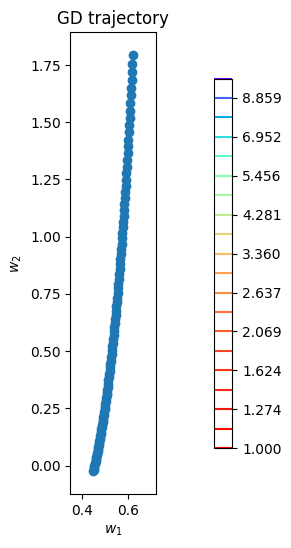

0.001


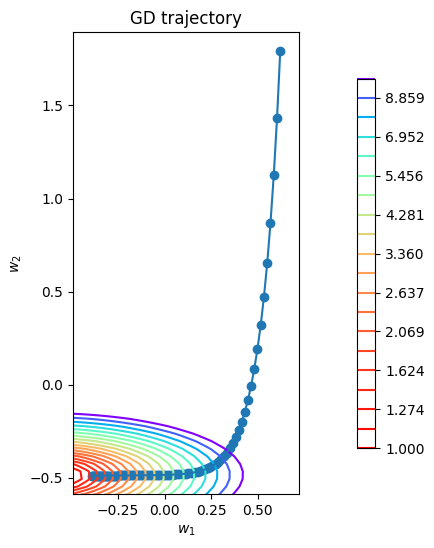

0.005


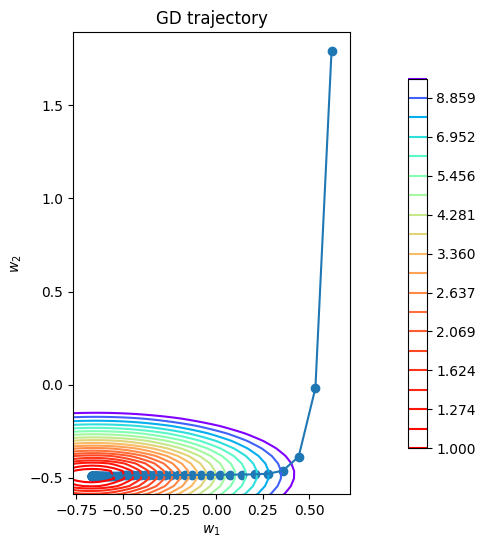

0.01


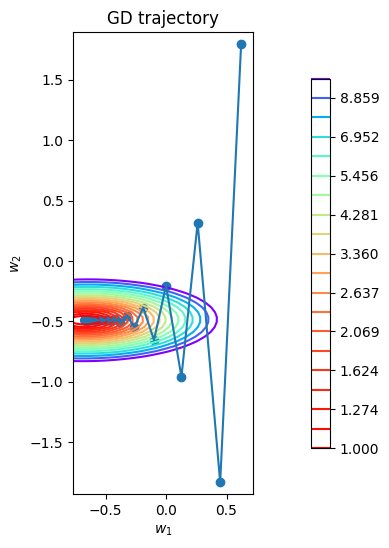

0.011


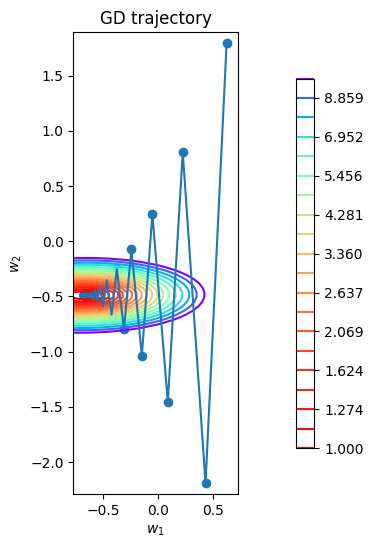

0.013


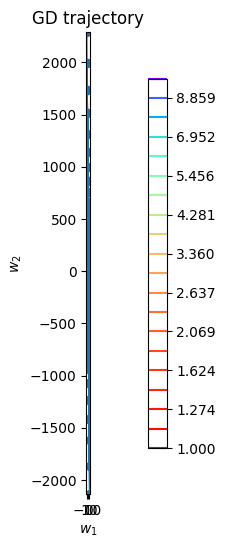

In [ ]:
for lr in [0.0001, 0.001, 0.005, 0.01, 0.011, 0.013]:
  w_list = gradient_descent(w_init, X, y, loss, lr, 100)
  print(lr)
  plot_gd(w_list, X, y, loss)




0.005 Идеально в этом контексте ведь оно не сильно прыгает, и нормально спускается в точку, доходит до центра.

При Learning Speed слишком маленьком –– мы слишком медленно двигаемся, и даже в начале не приближаемся вообще. Когда немного увеличиваем и уже попадаем на график – все равно не успеваем докатиться до минимума.
Однако если LR слишком высоко – мы прыгаем по всему графику, вылетаем за границы, это тоже не очень хорошо, ибо мы делаем большие шаги. Например на 0.013 мы вообще вылетели


Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_hist = [w.copy()]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      Xb = X[batch_indices]
      yb = y[batch_indices]

      grad = loss.calc_grad(Xb,yb,w)
      w -= lr * grad
      w_hist.append(w.copy())

    return w_hist

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

\\\\\ 
 lr: 0.0001
---- 
 batch_size: 1


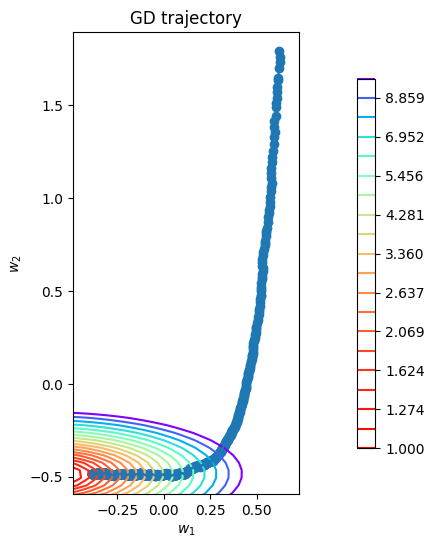

---- 
 batch_size: 10


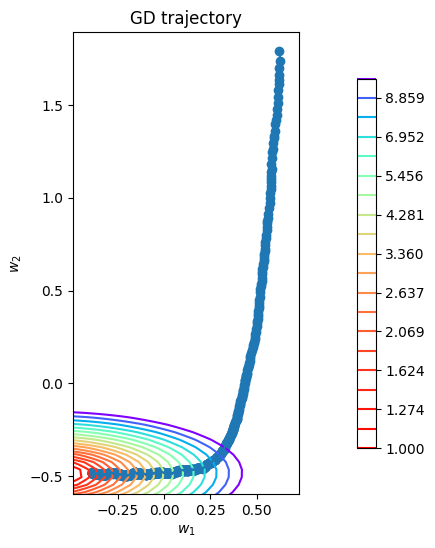

---- 
 batch_size: 50


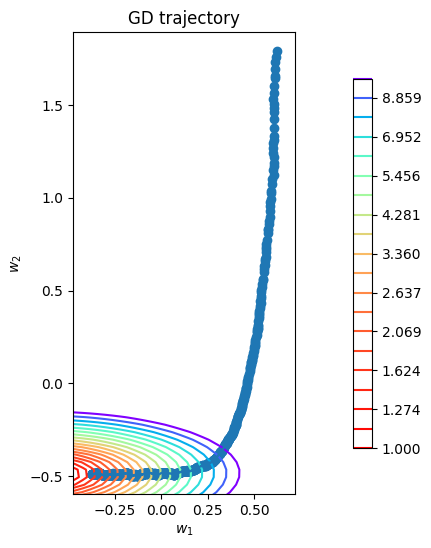

---- 
 batch_size: 300


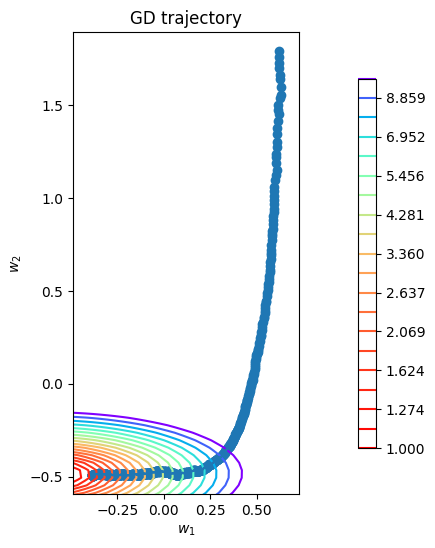

\\\\\ 
 lr: 0.001
---- 
 batch_size: 1


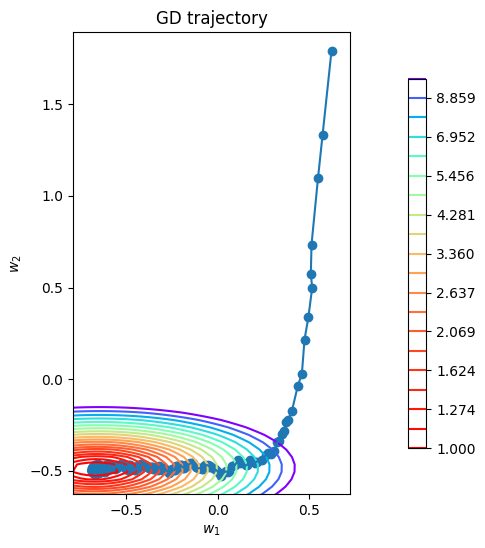

---- 
 batch_size: 10


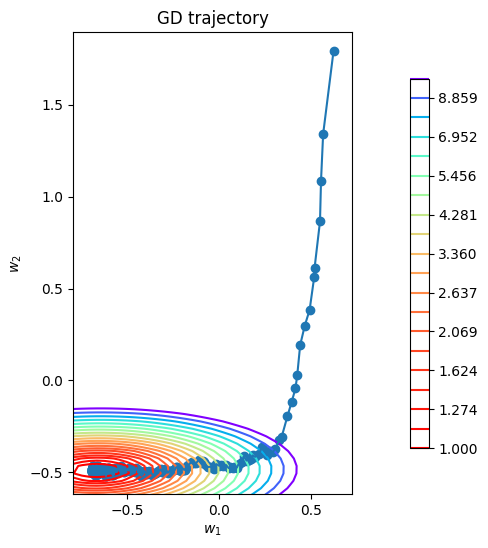

---- 
 batch_size: 50


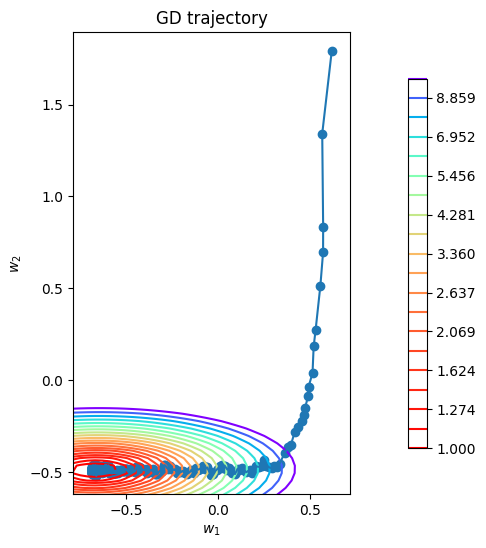

---- 
 batch_size: 300


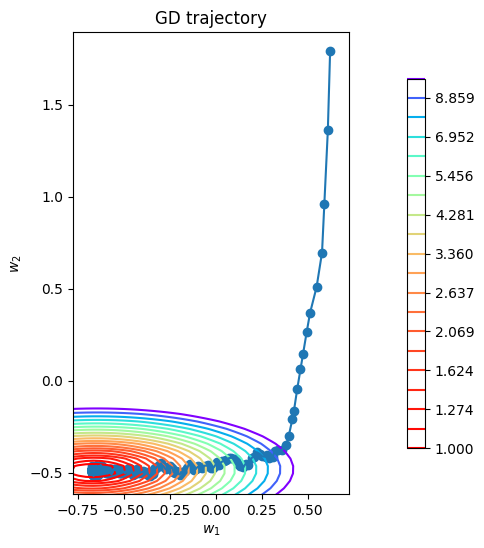

\\\\\ 
 lr: 0.005
---- 
 batch_size: 1


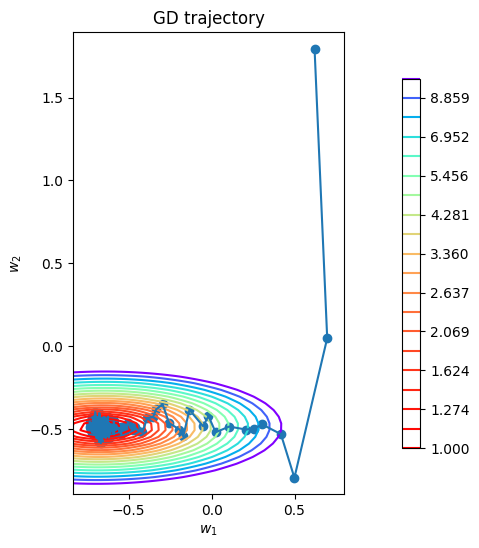

---- 
 batch_size: 10


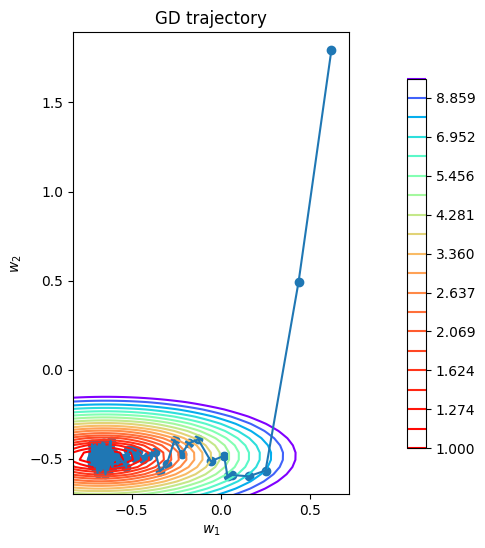

---- 
 batch_size: 50


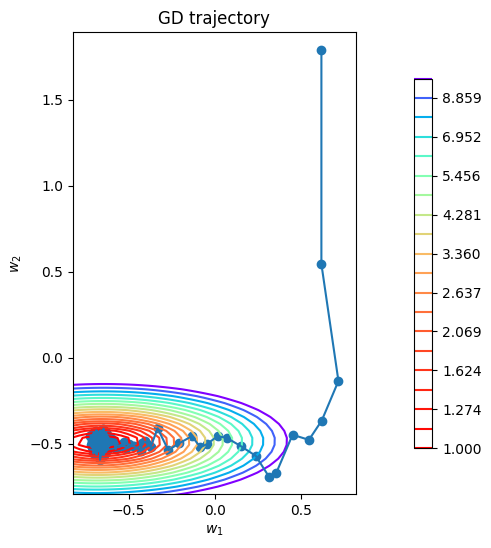

---- 
 batch_size: 300


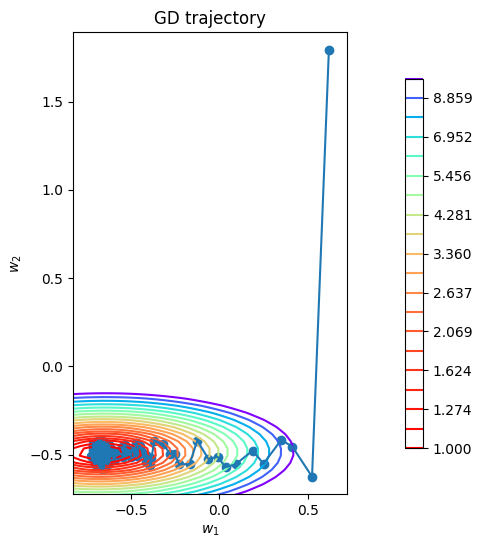

\\\\\ 
 lr: 0.01
---- 
 batch_size: 1


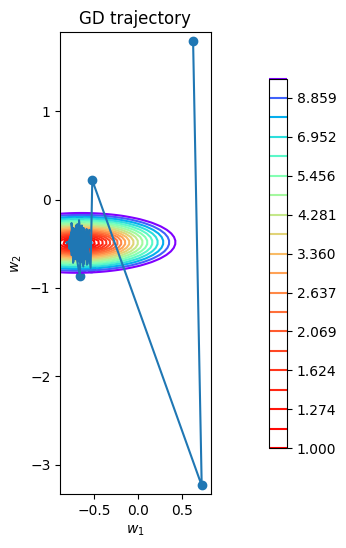

---- 
 batch_size: 10


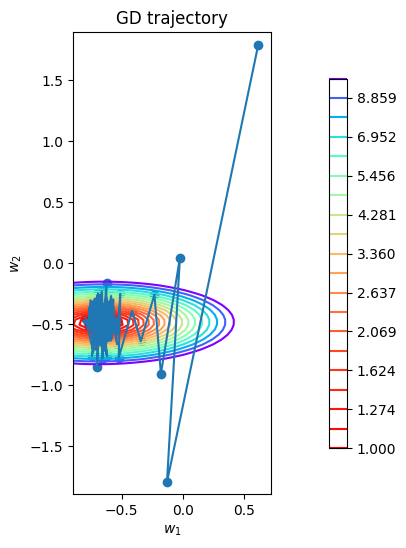

---- 
 batch_size: 50


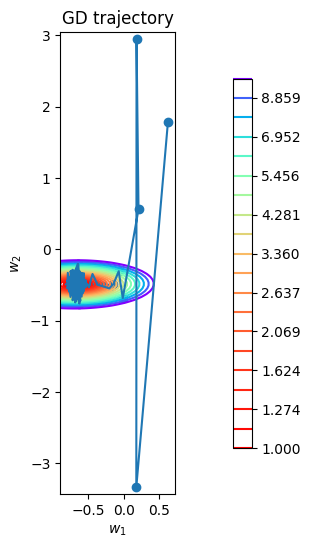

---- 
 batch_size: 300


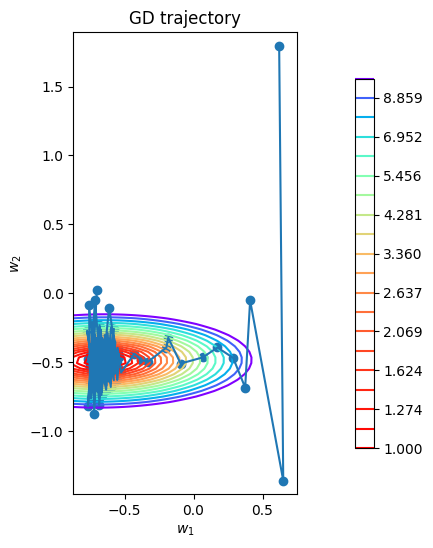

\\\\\ 
 lr: 0.011
---- 
 batch_size: 1


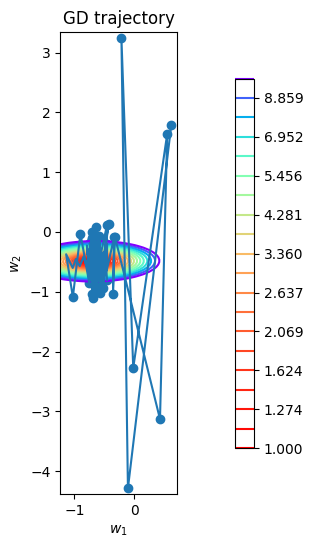

---- 
 batch_size: 10


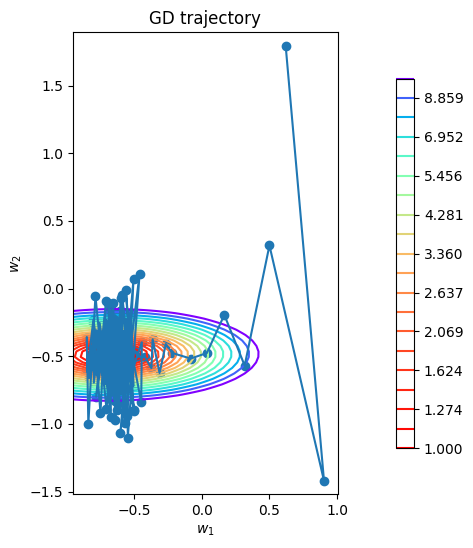

---- 
 batch_size: 50


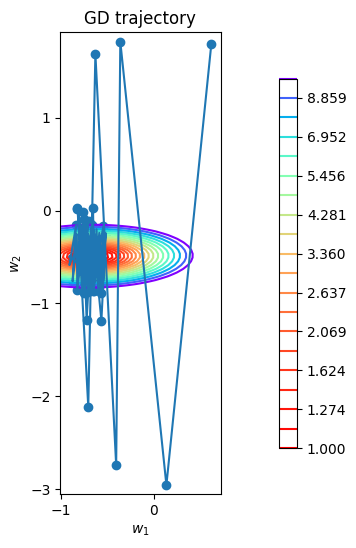

---- 
 batch_size: 300


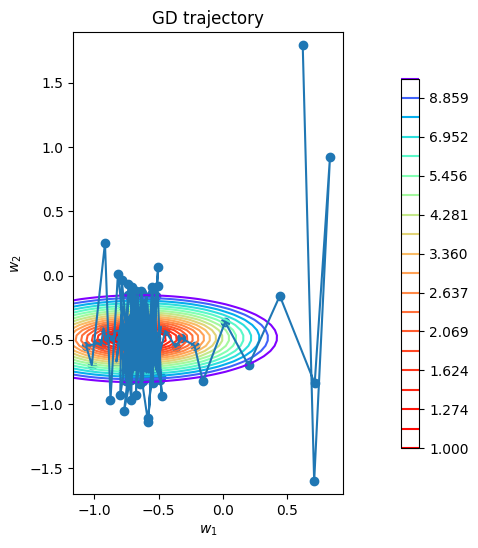

\\\\\ 
 lr: 0.013
---- 
 batch_size: 1


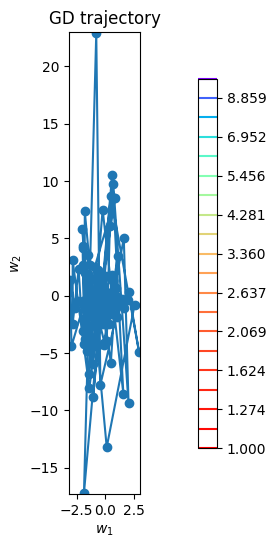

---- 
 batch_size: 10


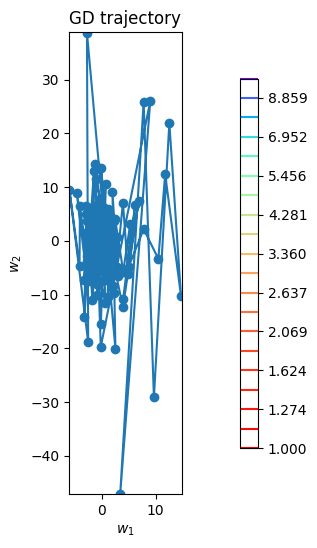

---- 
 batch_size: 50


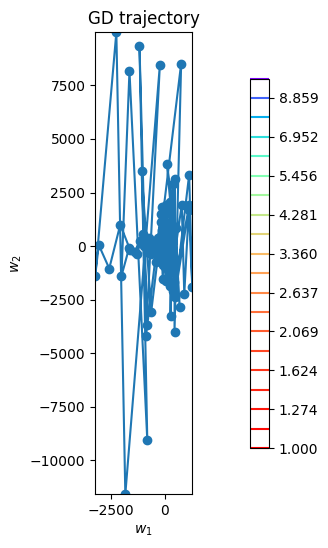

---- 
 batch_size: 300


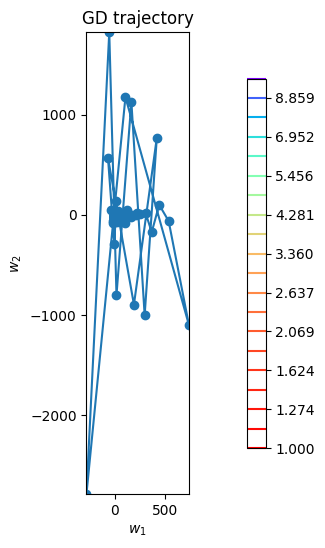

In [ ]:
for lr in [0.0001, 0.001, 0.005, 0.01, 0.011, 0.013]:
  print(f'\\\\\\\\\ \n lr: {lr}')
  for bs in [1, 10, 50, 300]:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
    print(f'---- \n batch_size: {bs}')
    plot_gd(w_list, X, y, loss)



Итак, влияние batchsize при низком lr некритично абсолютно, мы видим почти плавную линиию во всех случаях. Когда повышаем lr до более высоких значений, а с ним и понижаем batchsize – тем больше мы видим прыжков и неточностей.
Чем меньше batch_size тем больше "шума" в графике, и начинаются нетчоности. более стабилен batch при 50 в нашем случае, он наиболее сглажен по сравнению с другимт.
batch size может и более оптимизированный, но создает ненмого шума. но его использование оправданно при ощутимой немаленькой выборке

Чем больше bs тем больше график похож на обычный град. спуск. оно и логично, выборка же больше хихих


Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    w = w_init.copy()
    w_hist = [w.copy()]
    s0 = 1

    for i in range(n_iterations):
      nt = lr * (s0 / (s0+i)) ** p
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      Xb = X[batch_indices]
      yb = y[batch_indices]

      grad = loss.calc_grad(Xb,yb,w)
      w -= nt * grad
      w_hist.append(w.copy())

    return w_hist

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

\\\\\ 
 p: 0.01


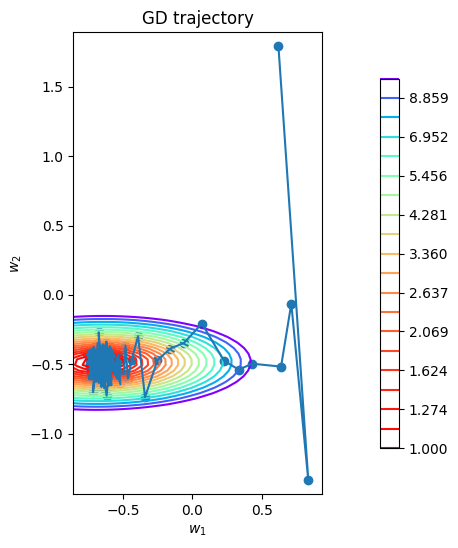

\\\\\ 
 p: 0.1


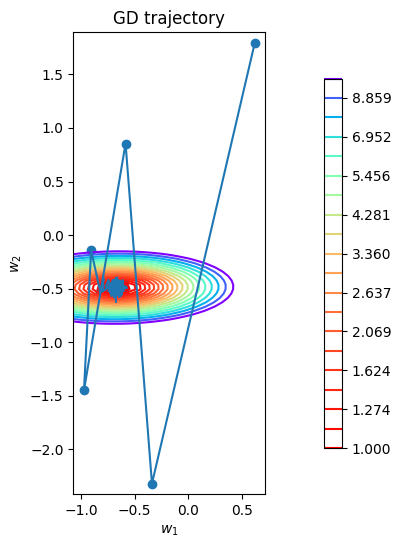

\\\\\ 
 p: 0.5


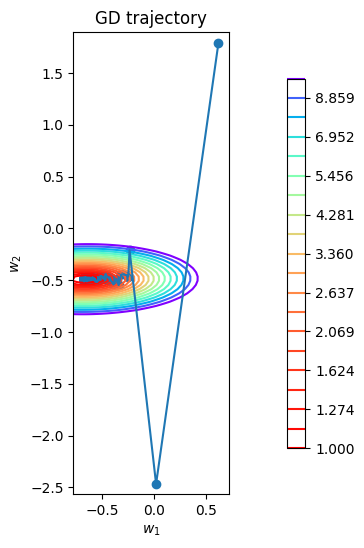

\\\\\ 
 p: 0.8


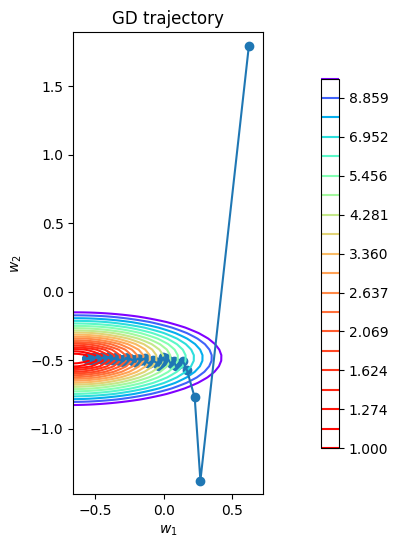

\\\\\ 
 p: 1


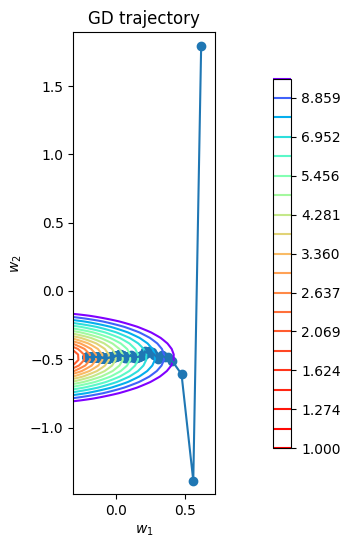

In [ ]:
lr = 0.01
batch_size = 10

for p in [0.01, 0.1, 0.5, 0.8, 1]:
  print(f'\\\\\\\\\ \n p: {p}')
  w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
  plot_gd(w_list, X, y, loss)


Чем выше p тем быстрее шаги уменьшаются.

Что происходит при маленьком или большом значении p? При маленьком p он все время случайнен (почти), затухание слабое, а в чем смысл тогда этого затухания, как говорится, только хуже сделали...
Если p среднее (в районе ≈0.5), то уже лучше, все супер. идем нормально
Ну а когда p огромный, мы видим в начале резкие рывки, ну а затем движемся около нуля постоянно. А затем застопориваемся, даже иногда не успеваем дойти до 0... Сомнительно, и не оукэй

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

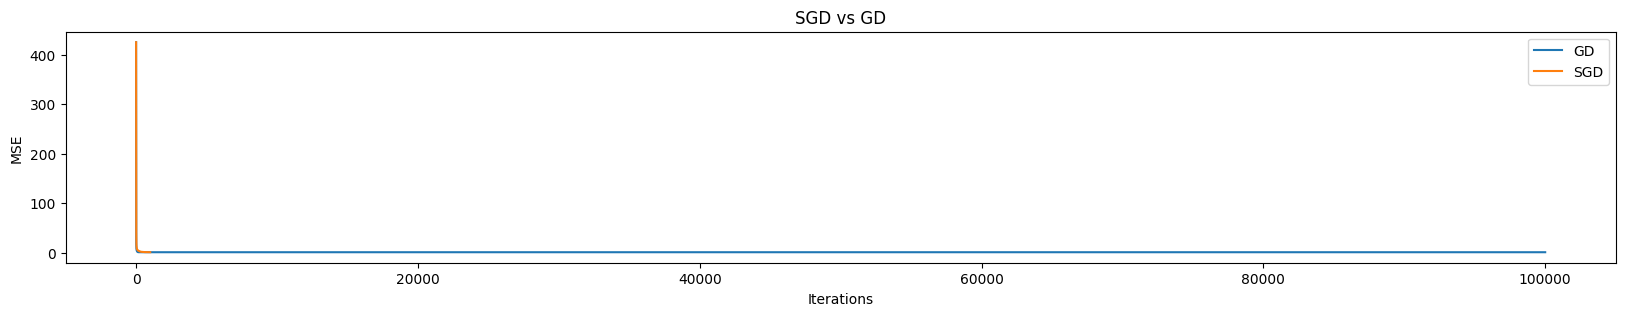

Text(0, 0.5, 'MSE')

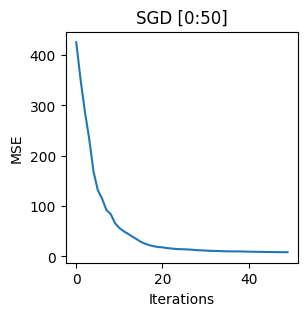

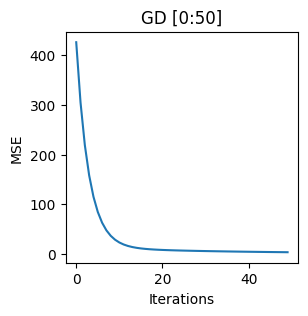

In [ ]:
batch_size = 10

w_list_gd = gradient_descent(w_init, X, y, loss, 0.001)
loss_gd = []
for w in w_list_gd:
  loss_gd.append(loss.calc_loss(X, y, w))

w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.001, batch_size, 0.3)
loss_sgd = []
for w in w_list_sgd:
  loss_sgd.append(loss.calc_loss(X, y, w))

plt.figure(figsize=(20,3))
plt.plot(loss_gd, label="GD")
plt.plot(loss_sgd, label="SGD")
plt.title('SGD vs GD')
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.show()

plt.figure(figsize=(3,3))
plt.title('SGD [0:50]')
plt.plot(loss_sgd[0:50])
plt.xlabel("Iterations")
plt.ylabel("MSE")

plt.figure(figsize=(3,3))
plt.title('GD [0:50]')
plt.plot(loss_gd[0:50])
plt.xlabel("Iterations")
plt.ylabel("MSE")

SGD доходит гораздо быстрее до нуля, что не может не радовать... 100.000 итераций гораздо хуже 1000≈ Ну и SGD чуть быстрее доходит в ноль, хотя я как-то поигрался с коэффициентами и это нивелировалось


## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = X.astype(np.float64)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w = np.zeros(X.shape[1], dtype=np.float64)
        w = w.astype(float)
        w_list = gradient_descent(w, X, y, self.loss, self.lr)
        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        res = X @ self.w
        return res

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах: (загрузил напрямую с гитхаба, давать гуглу доступ в этот раз не нужно)


In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/019bcc665551b537e2b0db8a14005fe55afd7fc8/2025/homeworks/hw05_gd/cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw = X_raw.dropna().reset_index(drop=True)

X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [ ]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

В ходе подготовки узнал на каком-то сайте о https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.25)
#до этого убрал nan в коде выше до X_raw


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler().fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
num_cols = X_train.select_dtypes(exclude='number').columns

X_train = pd.get_dummies(X_train, columns=num_cols)
X_test = pd.get_dummies(X_test, columns=num_cols)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
X_train

,1,2,10,11,12,13,14,17,19,20,...,15_ohcv,16_five,16_four,16_six,16_three,18_1bbl,18_2bbl,18_idi,18_mpfi,18_spdi
129,1.109046,0.414232,0.059951,0.355456,0.050162,-0.910854,0.507944,0.982427,1.231177,0.923854,...,False,False,True,False,False,False,False,False,True,False
34,0.240780,-0.478768,-0.967529,-1.123117,-0.689399,0.081397,-1.111665,-0.887842,-0.986963,-0.254661,...,False,False,True,False,False,False,True,False,False,False
123,0.240780,1.426299,-0.696119,-0.293041,-0.795050,-0.627354,-0.479623,-0.649808,-0.385434,-0.658724,...,False,False,True,False,False,False,True,False,False,False
4,1.109046,2.140699,0.602771,0.407336,-0.372444,0.175897,-0.082517,-0.309759,0.780030,-1.433177,...,False,False,True,False,False,False,False,False,True,False
149,-1.495753,-1.371769,1.203750,1.444931,0.895375,1.687899,1.246020,0.812403,1.832706,-0.254661,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1.109046,-0.776435,-0.153299,-0.033642,-0.002663,0.837398,-0.462990,-0.275754,-0.385434,0.587136,...,False,False,True,False,False,False,False,False,True,False
68,1.109046,1.426299,-0.579800,-0.837778,-0.900702,-0.296603,-0.887124,-0.683813,-0.535816,0.216745,...,False,False,True,False,False,False,True,False,False,False
145,1.109046,-0.776435,-0.153299,-0.033642,-0.002663,0.837398,-0.240528,-0.683813,-1.062154,0.587136,...,False,False,True,False,False,False,False,True,False,False
1,1.109046,1.307232,0.253815,0.390043,0.472769,0.175897,0.809411,0.642378,-0.385434,0.587136,...,False,True,False,False,False,False,False,False,True,False


***Задание 2.3 (5/8 балла):*** Обучите написанную вами линейную регрессию на обучающей *выборке*

In [ ]:
m = LinearRegression(MSELoss())
m.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = m.predict(X_train.values)
y_test_pred = m.predict(X_test.values)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"train: {train_mse}")
print(f"test: {test_mse}")


train: 540234.6003051338
test: 4148138.0403909893


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        y_pred = X @ w
        MSE = np.mean((y_pred - y)**2)
        wnb = w[:-1]
        l2 = self.coef * np.sum(w_no_bias ** 2)

        return MSE + l2
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X @ w
        xwy = y_pred - y
        grad = (2/len(y_pred)) * (X.T @ (X @ w - y))
        grad_l2 = 2.0 * self.coef * w
        grad_l2[-1] = 0
        return grad + grad_l2
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии,

например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
# m = LinearRegression(MSEL2Loss(0.1))
# m.fit(X_train, y_train)

m = LinearRegression(MSELoss(), lr=0.01)
m.fit(X_train.values, y_train)
y_tr_base = m.predict(X_train.values)
y_te_base = m.predict(X_test.values)
mse_tr_base = mean_squared_error(y_train, y_tr_base)
mse_te_base = mean_squared_error(y_test,  y_te_base)
print("=== Без регуляризации ===")
print(f" Train MSE = {mse_tr_base}")
print(f" Test  MSE = {mse_te_base}")
print("/////////////////////////\n")

print("=== С регуляризацией ===")
for i in [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]:
    m = LinearRegression(MSEL2Loss(coef=i), lr=0.01)
    m.fit(X_train.values, y_train)
    y_tr = m.predict(X_train.values)
    y_te = m.predict(X_test.values)
    tr_mse = mean_squared_error(y_train, y_tr)
    te_mse = mean_squared_error(y_test,  y_te)
    print(f"======\ni = {i}")
    print(f" Train MSE = {tr_mse}")
    print(f" Test  MSE = {te_mse}\n")


=== Без регуляризации ===
 Train MSE = 551075.7732811953
 Test  MSE = 3857799.1539374515
/////////////////////////

=== С регуляризацией ===
i = 1e-05
 Train MSE = 551530.0168273682
 Test  MSE = 3849146.097239787

i = 0.0001
 Train MSE = 556283.4698488383
 Test  MSE = 3780570.4767036713

i = 0.001
 Train MSE = 631059.5968257964
 Test  MSE = 3571231.045002663

i = 0.01
 Train MSE = 1163488.8836168735
 Test  MSE = 4353497.438118964

i = 0.1
 Train MSE = 2717333.867618833
 Test  MSE = 6749663.942606511

i = 0.5
 Train MSE = 4374676.750045157
 Test  MSE = 9418412.231498513

i = 1
 Train MSE = 5230462.3489177
 Test  MSE = 11092763.828538269



i = 0.001
 Train MSE = 631059.5968257964
 Test  MSE = 3571231.045002663

итак, ну мы видим небольшую разницу. не скажу что она сильно критична, но тестовая выборка показывает более хорошие результаты. но нужно играться с коэф.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

!!!подсмотрел частично тут
https://learningds.org/ch/20/gd_example.html !!!!!


In [55]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X @ w - y
        fe = np.where(np.abs(z) <= self.eps, 0.5 * z**2,
                      self.eps * (np.abs(z) - 0.5 * self.eps))
        HUBER = float(np.mean(fe))
        return HUBER


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X @ w - y
        grad_z = np.where(np.abs(z) <= self.eps, z, self.eps * np.sign(z))
        n = X.shape[0]
        grad_w = (1/n) * (X.T @ grad_z)

        return grad_w

        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [66]:
m = LinearRegression(MSELoss(), lr=0.01)
m.fit(X_train.values, y_train)
y_tr_base = m.predict(X_train.values)
y_te_base = m.predict(X_test.values)
mse_tr_base = mean_squared_error(y_train, y_tr_base)
mse_te_base = mean_squared_error(y_test,  y_te_base)
print("=== MSELoss() ===")
print(f" Train MSE = {mse_tr_base}")
print(f" Test  MSE = {mse_te_base}")
print("/////////////////////////\n")


# for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.25, 1.35, 1.5]:
#     m_huber = LinearRegression(HuberLoss(i), lr = 0.01)
#     m_huber.fit(X_train.values, y_train)
#     y_tr_hub = m_huber.predict(X_train.values)
#     y_te_hub = m_huber.predict(X_test.values)
#     tr_hub_loss = m_huber.loss.calc_loss(X_train.values, y_train, m_huber.w)
#     te_hub_loss = m_huber.loss.calc_loss(X_test.values, y_test, m_huber.w)
#     print(f"=== HuberLoss({i}) ===")
#     print(f" Train HUBER({i}) = {tr_hub_loss}")
#     print(f" Test  HUBER({i}) = {te_hub_loss}")

# 2) Подготовка X с bias-столбцом для HuberLoss.calc_loss
X_train_aug = np.hstack([X_train.values, np.ones((X_train.shape[0], 1))])
X_test_aug  = np.hstack([X_test.values,  np.ones((X_test.shape[0], 1))])

# 3) Перебираем разные ε для HuberLoss
for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.35, 1.5]:
    m_hub = LinearRegression(HuberLoss(i), lr=0.01)
    m_hub.fit(X_train.values, y_train)
    tr_hub = m_hub.loss.calc_loss(X_train_aug, y_train, m_hub.w)
    te_hub = m_hub.loss.calc_loss(X_test_aug, y_test, m_hub.w)
    print(f"=== HuberLoss(i={i}) ===")
    print(f"  Train HUBER = {tr_hub}")
    print(f"  Test  HUBER = {te_hub}\n")

=== MSELoss() ===
 Train MSE = 551075.7732811953
 Test  MSE = 3857799.1539374515
/////////////////////////

=== HuberLoss(i=0.1) ===
  Train HUBER = 1032.9203230704109
  Test  HUBER = 1206.4990756302573

=== HuberLoss(i=0.2) ===
  Train HUBER = 1928.748519172401
  Test  HUBER = 2280.366302521029

=== HuberLoss(i=0.4) ===
  Train HUBER = 3309.1285304711137
  Test  HUBER = 4030.205210084115

=== HuberLoss(i=0.6) ===
  Train HUBER = 4141.140033897797
  Test  HUBER = 5249.516722690955

=== HuberLoss(i=0.8) ===
  Train HUBER = 4490.3007890051695
  Test  HUBER = 5968.305254846996

=== HuberLoss(i=1.0) ===
  Train HUBER = 4682.057688823348
  Test  HUBER = 6425.3867867263

=== HuberLoss(i=1.35) ===
  Train HUBER = 4741.557833376793
  Test  HUBER = 6862.469744254251

=== HuberLoss(i=1.5) ===
  Train HUBER = 4691.911700329611
  Test  HUBER = 7010.085733470247



Я уже успел обрадоваться как хороши наши результаты, но потом вспомнил, что хубер метрику мы измеряем совершенно иначе... но тоже неплохо...

При маленьких коэффициентах, модель будет игнорировать большие ошибки (ну точнее меньше штрафовать за них), поэтому хубер-лосс получается небольшим.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

![okay this is crazy](https://github.com/tdrkn/thedrkn.github.io/blob/main/IMG_7033.JPG?raw=true)


### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE -- ʕ•ᴥ•ʔ